In [2]:
%config IPCompleter.greedy=True
%matplotlib inline

# Import our dependencies
import numpy as np
import pandas as pd
# scikit-learn
# https://scikit-learn.org/stable/index.html
import sklearn as skl
from sklearn.datasets import make_blobs
# TensorFlow and tf.keras
# https://www.tensorflow.org/api_docs/python/tf/keras
import tensorflow as tf

# Helper libraries
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

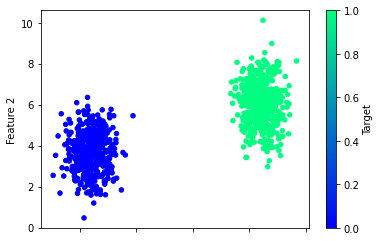

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use scikit-learn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize.

https://www.youtube.com/watch?v=mnKm3YP56PY&t=21s

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


The process of informing the model how it should learn and train is called compiling the model.

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input.

To enhance the performance of our classification neural network, we'll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

In [10]:
# There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE).
# We use accuracy for classification models and msefor regression models. For model predictive accuracy,
# the higher the number the better, whereas for regression models, MSE should reduce to zero.

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# To train/fit our Keras model, we'll use the fit method and provide the x training values and y training values, as well as the number of epochs.
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 783us/step - loss: 0.6392 - accuracy: 0.8965
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.9964
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.9981
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5910 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 957us/step - loss: 0.5695 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1000us/step - loss: 0.5587 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5417 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 869us/step - loss: 0.5273 - accuracy: 1.0000


<AxesSubplot:>

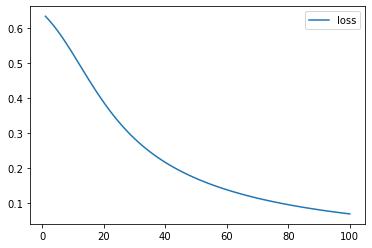

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

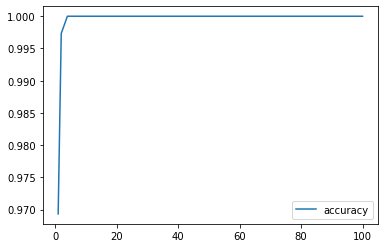

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
print("---------------------------------------------------------------------")
print(nn_model.evaluate(X_test_scaled,y_test))

8/8 - 0s - loss: 0.0716 - accuracy: 1.0000
Loss: 0.07157086580991745, Accuracy: 1.0
---------------------------------------------------------------------
8/8 [==============================] - 0s 858us/step - loss: 0.0716 - accuracy: 1.0000
[0.07157086580991745, 1.0]


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=42)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

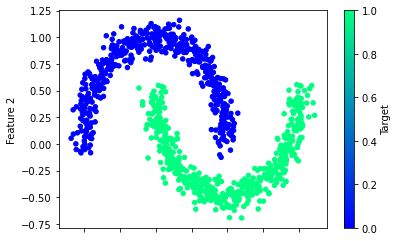

In [19]:
# We'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib.
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=42)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [20]:
# We need to split our nonlinear data into training and testing datasets and normalize our datasets.

# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [21]:
# We'll train our neural network model using the fit method on the nonlinear training data.

# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8979 - accuracy: 0.5507
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8079 - accuracy: 0.5680
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7440 - accuracy: 0.5893
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6986 - accuracy: 0.6053
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.6187
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6373
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.6427
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5900 - accuracy: 0.6520
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.6653
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.6680
Epoch 11/

<AxesSubplot:>

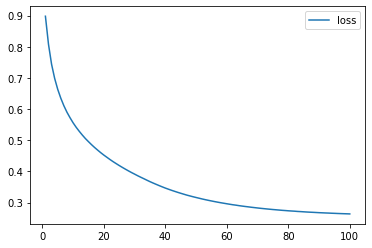

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

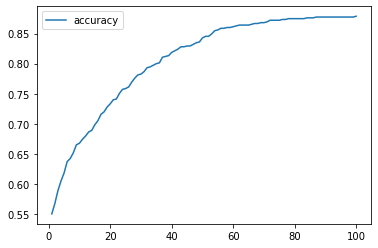

In [23]:
# Plot the loss
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 913us/step - loss: 0.7626 - accuracy: 0.4720
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7372 - accuracy: 0.4710
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.4401
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6451 - accuracy: 0.4886
Epoch 5/100
24/24 [==============================] - 0s 956us/step - loss: 0.6116 - accuracy: 0.4946
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6128 - accuracy: 0.4881
Epoch 7/100
24/24 [==============================] - 0s 739us/step - loss: 0.5861 - accuracy: 0.4866
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5604 - accuracy: 0.5185
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.5050
Epoch 10/100
24/24 [==============================] - 0s 783us/step - loss: 0.5453 - accuracy: 0.4961
E

In [30]:
# Outlier Identification
df_moons.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.00000
mean,0.498805,0.247856,0.50000
std,0.870305,0.499844,0.50025
min,-1.174206,-0.694653,0.00000
25%,-0.050691,-0.217649,0.00000
50%,0.534336,0.235087,0.50000
75%,1.052125,0.707188,1.00000
max,2.211626,1.159381,1.00000


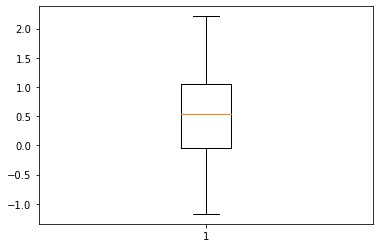

In [28]:
# Plotting a variable using Pandas' Series.plot method to look for outliers
plt.boxplot(df_moons["Feature 1"])
plt.show()

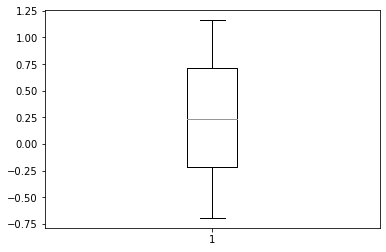

In [31]:
# Plotting a variable using Pandas' Series.plot method to look for outliers
plt.boxplot(df_moons["Feature 2"])
plt.show()

For a neural network to understand and evaluate a categorical variable, we must preprocess the values using a technique called one-hot encoding.

The process of reducing the number of unique categorical values in a dataset is known as bucketing or binning. Bucketing data typically follows one of two approaches:

- Collapse all of the infrequent and rare categorical values into a single "other" category.
- Create generalized categorical values and reassign all data points to the new corresponding values.